```bash
## RUN FROM THE TERMINAL WITH PYTHON
$ jupyter nbconvert --to script x11_classifier_best_pipeline.ipynb
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
from sklearn.tree import DecisionTreeClassifier

### Load libraries

In [3]:
# Custom scikit-learn like pipeline with additional functionalities
import pipeline as pl

In [4]:
# How the pipeline should be run for this project
from model.AdData import *
from model.AdFeatures import *
from model.AdClassify import TestPerformance

In [5]:
# Utilities
from model import hyperparams
from model import plotlib

### Initialize

In [6]:
plotlib.load_fonts("../../../common/fonts/")
plt.style.use("matplotlib.mplstyle")

runName = 'classifier_pl_run_xgb'
outputCsv = "%s_results.csv" %runName

In [7]:
# Save outputs to log files
# pl.set_stderr("%s.errlog.txt" %runName, fout="%s.log.txt" %runName)

In [8]:
inputCsv = "../Data/imputed_data.mice.csv"
ignoreXCols = ['imp', 'id', 'quality', 'lobe', 'full', 'other', 'coatingId']

# The initial hyperparams of the best models

In [9]:
# The best models
xgbest1 = dict(base_score=0.5, booster='gbtree', callbacks=None,
    colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
    early_stopping_rounds=None, enable_categorical=False,
    eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
    importance_type=None, interaction_constraints='',
    learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
    max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
    monotone_constraints='()', n_estimators=3, n_jobs=0,
    num_parallel_tree=1, objective='multi:softmax', predictor='auto',
    random_state=0, reg_alpha=0.4)


xgbest2 = dict(base_score=0.5, booster='gbtree', callbacks=None,
    colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
    early_stopping_rounds=None, enable_categorical=False,
    eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
    importance_type=None, interaction_constraints='',
    learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
    max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
    monotone_constraints='()', n_estimators=8, n_jobs=0,
    num_parallel_tree=1, objective='multi:softproba', predictor='auto',
    random_state=0, reg_alpha=0.4)

xgbest3 = dict(base_score=0.5, booster='gbtree', callbacks=None,
    colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
    early_stopping_rounds=None, enable_categorical=False,
    eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
    importance_type=None, interaction_constraints='', learning_rate=1,
    max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=7,
    max_leaves=0, min_child_weight=1,
    monotone_constraints='()', n_estimators=3, n_jobs=0,
    num_parallel_tree=1, objective='multi:softproba', predictor='auto',
    random_state=0, reg_alpha=0.1)


bestXcols = ['lsfw1', 'lsfw2', 'lsfw3', 'lspk2', 'lspk3', 'teosVolPct',
       'teosVolume', 'tsfw1', 'tsfw2', 'tsfw3', 'tspk1', 'tspk2', 'tspk3']

# Grid pipeline

In [10]:
loader = LoadData(csv=inputCsv, resample=True)
loader.Execute(None)
loader.testdf

 -- LoadData() ... 
	 Test IDs: [14, 7, 20, 29, 16, 4]
	 Test classes: ['full', 'full', 'other', 'lobe', 'full', 'full']
	 Performed train/test split.



,imp,id,tspk1,tsfw1,lspk1,lsfw1,tspk2,tsfw2,lspk2,lsfw2,...,lspk3,lsfw3,teosVolume,teosVolPct,quality,lobe,full,other,coating,coatingId
name,,,,,,,,,,,,,,,,,,,,,
trial_05,0,4,519,46.014336,772,105.349272,521.0,51.028356,765.0,106.424655,...,771.0,118.127834,75.0,20,3,0.040000,0.680000,0.280000,full,0
trial_08,0,7,517,48.076381,717,88.568606,512.0,37.261999,720.0,92.623238,...,717.0,96.284753,125.0,20,4,0.000000,0.744681,0.255319,full,0
trial_27,0,14,516,35.753805,796,101.536350,513.0,36.940846,811.0,94.240396,...,795.0,101.025205,125.0,20,7,0.300000,0.233333,0.466667,other,1
trial_29,0,16,512,32.999844,796,97.292980,512.0,36.486899,807.0,92.086084,...,807.0,90.460507,125.0,20,7,0.526316,0.000000,0.473684,lobe,2
Rowe2018_F2a,0,20,511,37.076300,808,94.516855,516.0,40.492574,845.0,76.256472,...,815.0,94.474883,50.0,20,7,0.000000,1.000000,0.000000,full,0
trial_37,0,29,516,40.473300,789,109.682600,518.0,41.987400,806.0,113.479200,...,783.0,126.805800,50.0,20,4,0.000000,0.700000,0.300000,full,0


In [56]:
grid = [
    # [loader for i in range(20)],
    loader,
    ImputedData(),
    pl.SetYCol('coatingId'),
    pl.Set(scoring='f1_weighted'), #scoring used by sklearn
    pl.DropCol('coating'),
    pl.AllValidFeatures(ignoreCols=ignoreXCols),
    pl.AugmentByQuality(F=1, scale=0.3, qcol='quality'),
    AggregateFeatures(show=False),
    pl.SplitValidation(split_fraction=0.1),
    pl.ScaleX(allColumns=True),
    pl.SetModel(DecisionTreeClassifier()),
    pl.SelectFeaturesRFE(show=True),
    pl.SetAlgorithm(XGBClassifier, **xgbest2),
    pl.SearchHyperParams(hyperparams.space),
    TestPerformance(show=True, use_validation=True),
    TestPerformance(show=True, use_test=True),
]

In [57]:
pipe = pipeline.GridLine(grid)
pipe.Shuffle() # suffle the list, so we immediately have data for analysis
pipe.Save(outputCsv) # save the results after each pipeline run

Initialized 1 pipelines.


In [58]:
pipe.Execute(inputCsv)

Pipeline 01 of 01:
================================================ >>
 -- LoadData() ... 
	 Test IDs: [4, 22, 17, 16, 28, 15]
	 Test classes: ['full', 'other', 'lobe', 'full', 'full', 'full']
	 Performed train/test split.

 -- ImputedData() ... ok
 -- SetYCol: coatingId ... 'coatingId' ok
 -- Set: scoring ... 
	 {'scoring': 'f1_weighted'}

 -- DropCol: coating ... ok
 -- AllValidFeatures() ... 
	 Selected 14 features.

 -- AugmentByQuality: F=1 scale=0.30 ... 
	 Old shape: (120, 21), New shape: (180, 21)

 -- AggregateFeatures() ... ok
 -- SplitValidation: 0.10 ... 
	 Training shape: (129, 69), Validation shape: (18, 69)

 -- ScaleX: StandardScaler All: True ... 
	 Scaled all columns.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SelectFeaturesRFE() ... 
	 RFE 5-fold CV with DecisionTreeClassifier() selected 6 features.
	 ['tsfw1', 'tspk3', 'lspk3', 'lsfw3', 'teosVolume', 'teosVolPct']

 -- SetAlgorithm: XGBClassifier ... ok
 -- SearchHyperParams() ... running randomized search ...

In [59]:
df = pipe.Summarize()
df[df == ""] = np.nan
df[df.wt_f1 > 0.5].sort_values("wt_f1", ascending=False)

,score,model,xcols,val_wt_f1,val_acc,wt_f1,acc,S01,S02,S03,...,S07,S08,S09,S10,S11,S12,S13,S14,S15,S16
L01,1.0,"XGBClassifier(base_score=0.5, booster='gbtree'...",tsfw1 tspk3 lspk3 lsfw3 teosVolume teosVolPct,0.835105,0.833333,0.666667,0.666667,LoadData,ImputedData,SetYCol: coatingId,...,AugmentByQuality: F=1 scale=0.30,AggregateFeatures,SplitValidation: 0.10,ScaleX: StandardScaler All: True,SetModel: DecisionTreeClassifier,SelectFeaturesRFE,SetAlgorithm: XGBClassifier,SearchHyperParams,TestPerformance,TestPerformance


In [60]:
best_pipelines = [int(l.replace("L", "")) - 1 for l in df[df.wt_f1 > 0.5].index]
len(best_pipelines)

1

In [61]:
best_models = [pipe.results[i] for i in best_pipelines]

In [62]:
ml = best_models[0]
Ts = loader.traindf

df1 = Ts[ml.model.feature_names_in_]
sclr = StandardScaler().fit(df1)
        
df2 = pd.DataFrame(sclr.transform(df1), index=df1.index, columns=df1.columns)
pr = ml.model.predict(df2)
prob = ml.model.predict_proba(df2)[:,2]

In [63]:
yp = pd.DataFrame({ 'pred': pr, 'prob': prob}, index=Ts.coatingId)

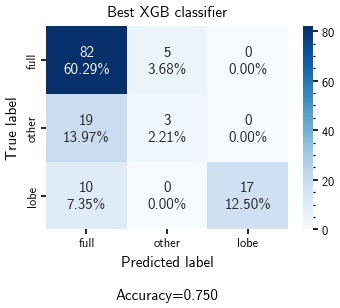

In [64]:
plotlib.make_confusion_matrix(confusion_matrix(yp.index, yp.pred), categories=list(loader.labels))

plt.title("Best XGB classifier")
plt.minorticks_off()
plt.savefig("../Plots/x11_best_xgb_confusion.png")
plt.show()

In [17]:
def ensemble_predict(best_models, Ts):
    """ Given the set of models, and a dataframe, make weighted 
    classification prediction using prediction probabilities.
    
    Notes: Ts must contain all the columns, standard scaling will be performed.
    """
    pr = {}
    prob = {}
    for m, ml in enumerate(best_models):
        m = 'ml' + str(m)
        df1 = Ts[ml.model.feature_names_in_]
        sclr = StandardScaler().fit(df1)
        
        df2 = pd.DataFrame(sclr.transform(df1), index=df1.index, columns=df1.columns)
        pr[m] = ml.model.predict(df2)
        
        try:
            # 2 == lobes
            prob[m] = ml.model.predict_proba(df2)[:,2]
        except Exception as err:
            print(m, 'predict_proba() failed, using probability 1.\n', err)
            prob[m] = 1

    pr = pd.DataFrame(pr, index=Ts.coatingId)
    prob = pd.DataFrame(prob, index=Ts.coatingId)
    
    wt = prob.copy()
    for col in prob:
        wt[col] = pr[col] * prob[col]
    wt = np.ceil(wt.mean(axis=1))
    return wt

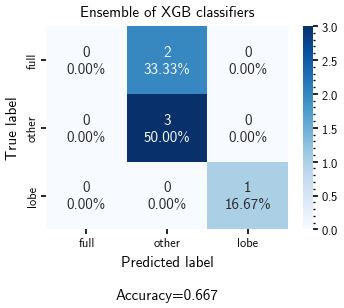

In [18]:
Ts = loader.testdf
p = ensemble_predict(best_models, Ts)
y = p.index

plotlib.make_confusion_matrix(confusion_matrix(y, p), categories=list(loader.labels))

plt.title("Ensemble of XGB classifiers")
plt.minorticks_off()

plt.savefig("../Plots/x11_ensemble_xgb_confusion.png")
plt.show()